# Practical Session 2 : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

In [ ]:
#Downloading images
!wget https://perso.telecom-paristech.fr/rachddou/teaching_material/images.zip
!unzip -qq images.zip 
!rm images.zip
!rm -rf __MACOSX

--2022-10-27 13:12:11--  https://perso.telecom-paristech.fr/rachddou/teaching_material/images.zip
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22981078 (22M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  21.92M  11.2MB/s    in 2.0s    

2022-10-27 13:12:14 (11.2 MB/s) - ‘images.zip’ saved [22981078/22981078]



In [1]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical morphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the functions of the morpho library to visualize a disk structuring element of radius 3. 

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


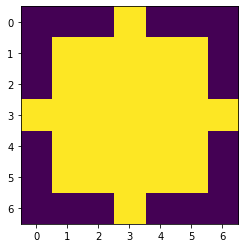

In [2]:
if student :
  strell = morpho.disk(3)

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

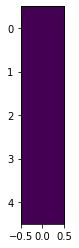

In [3]:
def line_strell(l):
  if student:
    strell = np.ones((l,1))
  return(strell)

if student: 
  l = 5
  strell_line = line_strell(l)
  plt.imshow(strell_line)
  plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

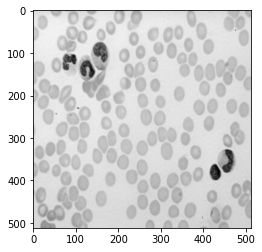

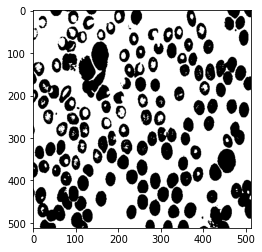

In [4]:
#load the cell image in grayscale and display it 
if student:
  img = skio.imread("images/cell.tif")
  plt.imshow(img, cmap='gray')
  plt.show()

  bimg = ( img > 150 )
  plt.imshow(bimg, cmap='gray')
  plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

In [5]:
def morpho_operations(bimg, strell):

    fig,ax = plt.subplots(2, 2, figsize=(15,15))
    ax = ax.reshape(-1)

    erosion = morpho.binary_erosion(bimg, strell)
    dilation = morpho.binary_dilation(bimg, strell)
    opening = morpho.binary_opening(bimg, strell)
    closing = morpho.binary_closing(bimg, strell)

    imgs = [erosion, dilation, opening, closing] # Add in this list the 4 images, obtained with the 4 operations

    names = ["erosion","dilation","opening","closing"]

    for i in range(4):
        ax[i].set_title(names[i])
        ax[i].imshow(imgs[i],cmap = "gray")
    plt.show()

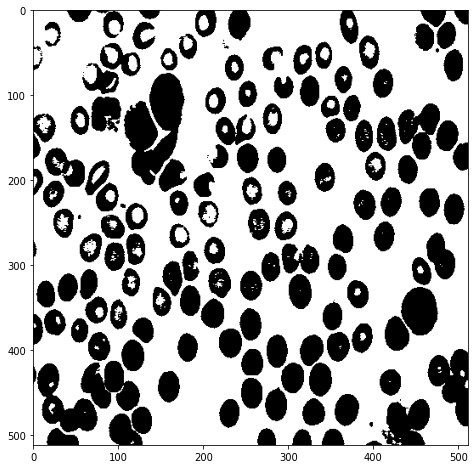

In [6]:
plt.figure( figsize=(8,8) )
plt.imshow(bimg, cmap='gray')
plt.show()

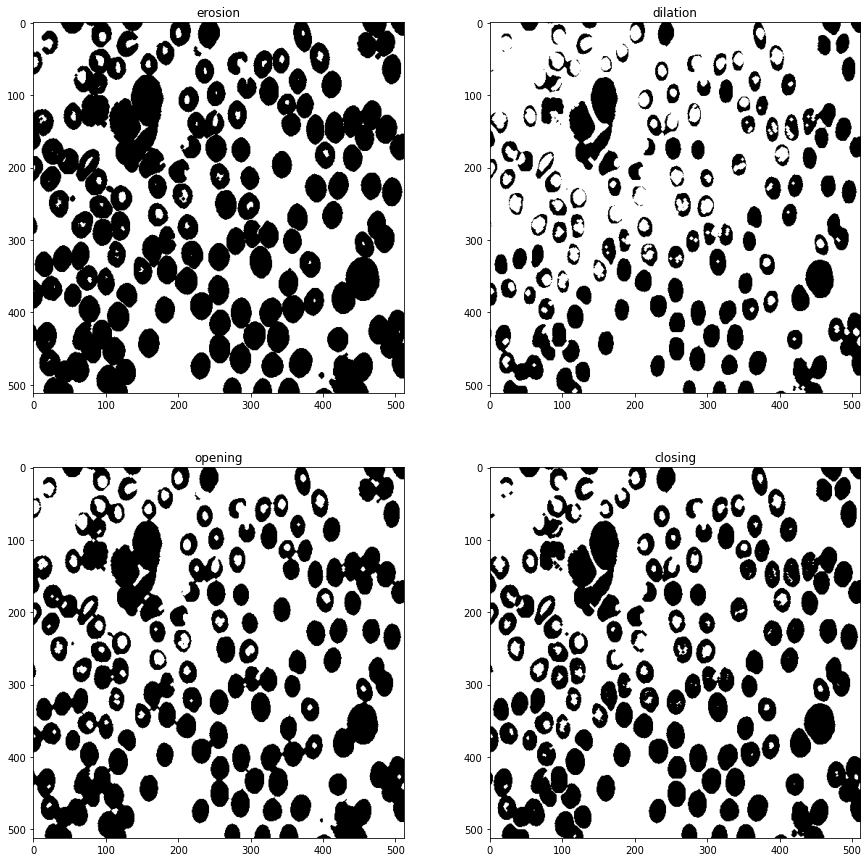

In [7]:
strell = morpho.disk(2)
morpho_operations(bimg, strell)

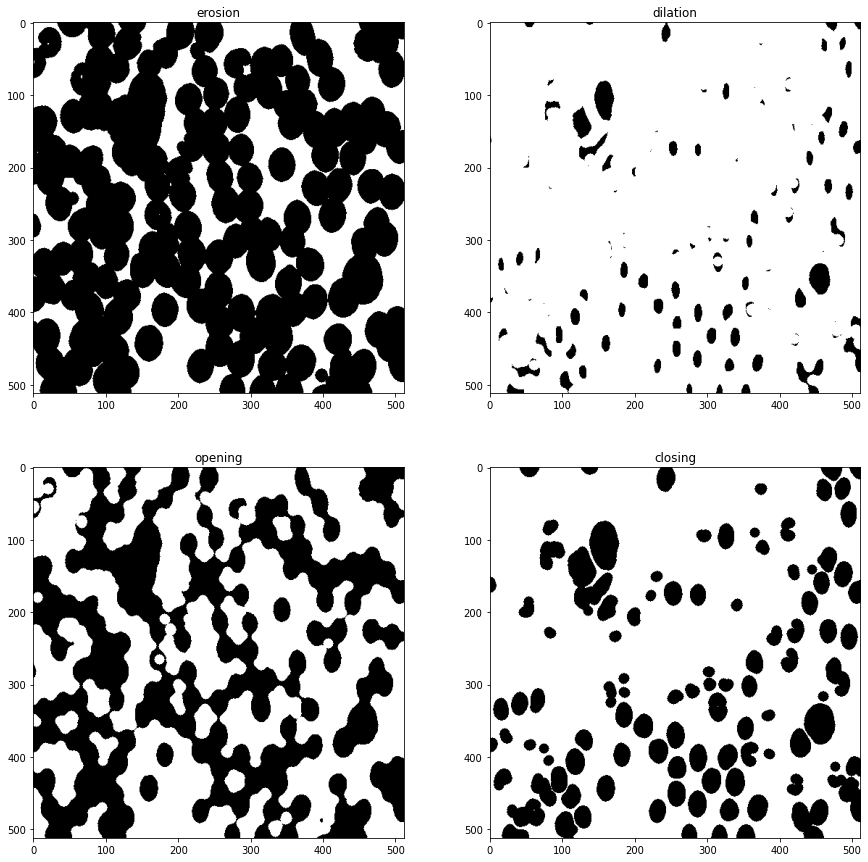

In [8]:
strell = morpho.disk(7)
morpho_operations(bimg, strell)

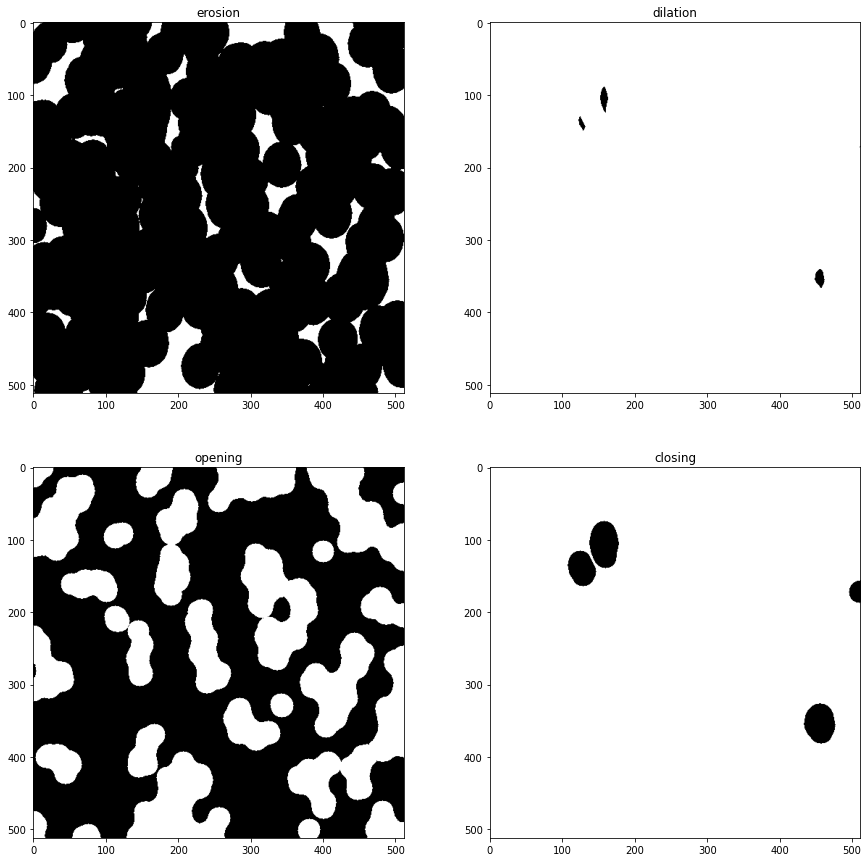

In [9]:
strell = morpho.disk(15)
morpho_operations(bimg, strell)

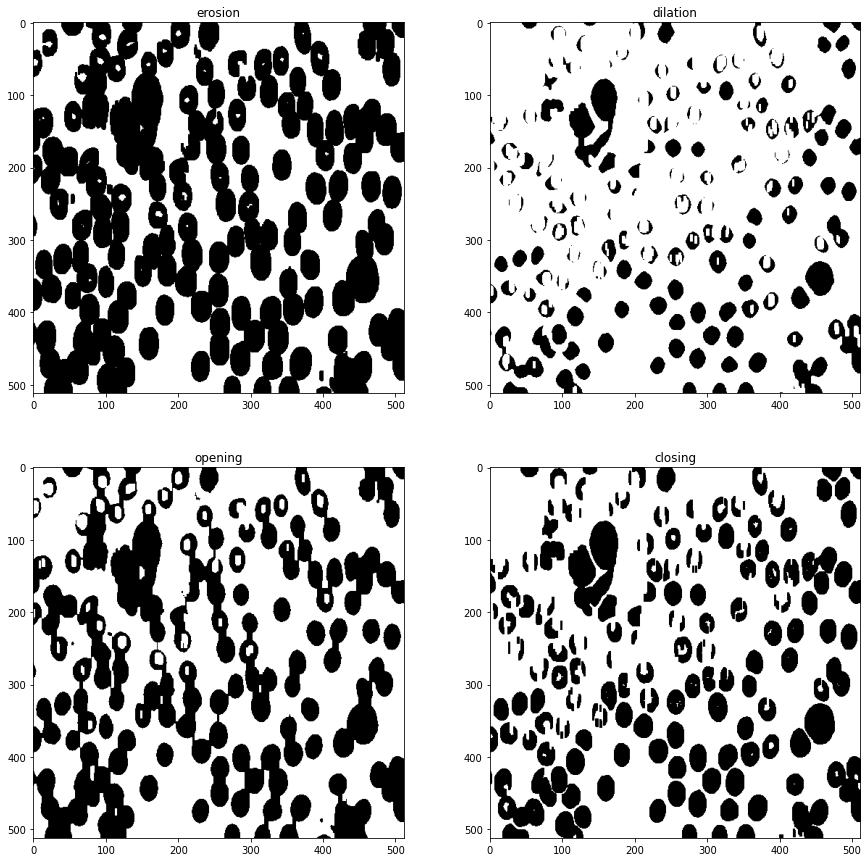

In [10]:
# try your own structuring elements and make the size vary
def line_strell(l, w):
  if student:
    strell = np.ones((l,w))
  return(strell)

if student :
  strell = line_strell(10, 3)
  morpho_operations(bimg, strell)

- **Q** : What is the influence of the shape of the structuring element?
- **A** : In this case, where the objetcs of interest are black, for the closing operation, the shape of the structuring element determines the shape we are looking for in the image, for example, if the structuring element is a circle, the algorithm tries to fit circles into the objects. For the opening operation, we see that the objects are merged, according to the shape of the structuring element, when using a circle, objects that are close to each other are merged no matter the direction of the connection, but when using a vertical line as the structuring element, the connections occurs according to the direction of the segment.

- **Q** : What is the influence of the size of the structuring element?
- **A** : In this case, where the objetcs of interest are black, for the closing operation, we keep the structures that resemble the structuring elements, but with size comparable or greater then that of the structuring element. This can be seen for instance when we use a circle of varying size as the structuring element, for a radius of $15$ only the larger cells were kept. For the opening operation, as we increase the size of the structuring element, the degree of merging increases: objects whose distance is comparable to the size of the structuring element are merged.

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


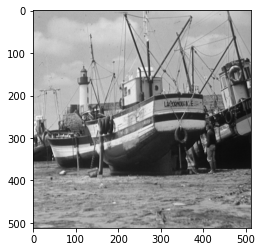

In [11]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes. 

In [12]:
def greyscale_morpho_operations(bimg, strell):

    fig,ax = plt.subplots(2, 2, figsize=(15,15))
    ax = ax.reshape(-1)

    erosion = morpho.erosion(bimg, strell)
    dilation = morpho.dilation(bimg, strell)
    opening = morpho.opening(bimg, strell)
    closing = morpho.closing(bimg, strell)

    imgs = [erosion, dilation, opening, closing] # Add in this list the 4 images, obtained with the 4 operations

    names = ["erosion","dilation","opening","closing"]

    for i in range(4):
        ax[i].set_title(names[i])
        ax[i].imshow(imgs[i],cmap = "gray")
    plt.show()

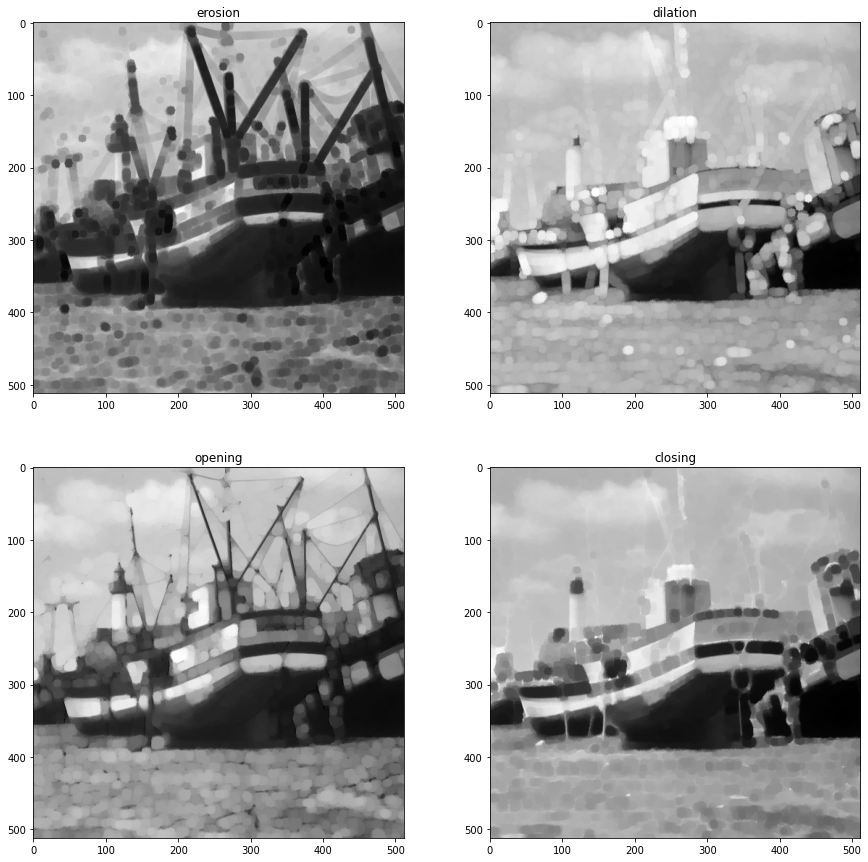

In [13]:
if student:
  strell = morpho.disk(5)
  greyscale_morpho_operations(img, strell)

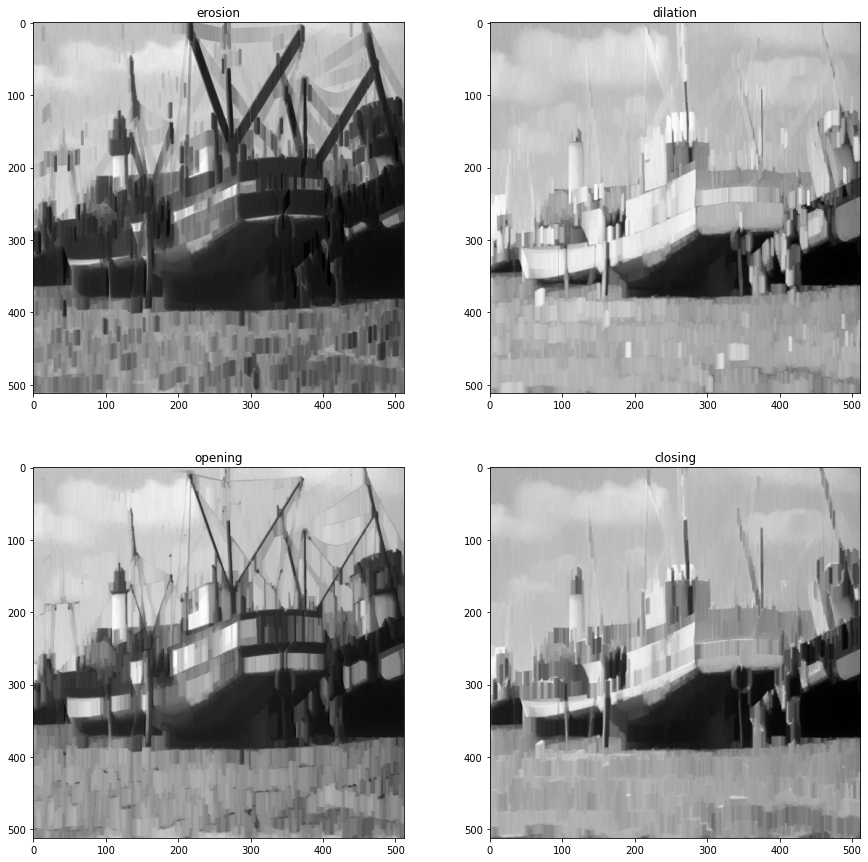

In [14]:
if student :
  strell = line_strell(20, 3)
  greyscale_morpho_operations(img, strell)

- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : For the erosion (dilation) operation, the dark (light) regions are enlarged according to the structuring element's shape and size and small light (dark) regions are supressed. For the opening (closing) operation the size of the objects is more or less preserved, but small peak (valley) like variations are supressed; also, the shape of the structuring element determines the direction in which those variations are supressed, when using a circle, the supression is isotropic, when using a vertical segment, variations are supressed in the vertical direction, this becomes clear when observing what happens to the text and ropes of the boat. Furthermore, the greater the size of the structuring elemet, the blurrier the image becomes.

- **Q** : How can you illustrate the iterativity property of the dilation ? What is the
result of a dilation by a structuring element of size 2 followed by a dilation by a
structuring element of size 3 (and same shape)? Show your illustration in the next cell.
- **A** : The iteration property of dilation if formally stated as:
$$D\left[ D(X, B), B'\right] = D\left( X, B \oplus B'\right)$$
Therefore, dilation by a structuring element of size 2 followed by a dilation by an element of same shape but size 3 corresponds to dilating the image by a structuring element that is the dilation of one of the original structuring elements by the other, as illustrated bellow.

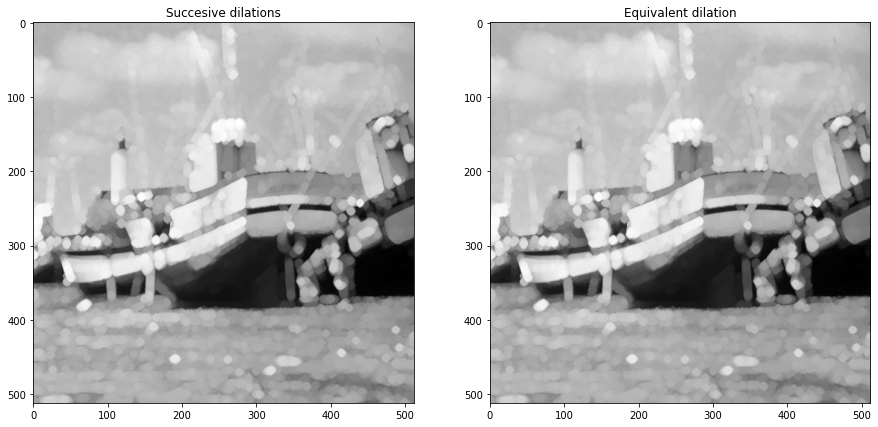

In [15]:
if student:
  
  s1 = 2
  s2 = 3

  fig,ax = plt.subplots(1,2, figsize=(15,8))
  ax = ax.reshape(-1)

  # dilation by a structuring element of size 2, and then of size 3
  strell1 = morpho.disk(s1)
  dilation1 = morpho.dilation(img, strell1)
  strell2 = morpho.disk(s2)
  dilation2 = morpho.dilation(dilation1, strell2)

  # dilation by the dilation of the structuring elements
  strell1_padded = np.zeros( (2*(s1+s2)+1, 2*(s1+s2)+1) )
  strell1_padded[ s2:s2+2*s1+1, s2:s2+2*s1+1 ] = strell1 
  strelld = morpho.dilation(strell1_padded, strell2)
  dilationeq = morpho.dilation(img, strelld)

  imgs = [dilation2, dilationeq] 

  names = ["Succesive dilations","Equivalent dilation"]

  for i in range(2):
      ax[i].set_title(names[i])
      ax[i].imshow(imgs[i],cmap = "gray")
  plt.show()

In [16]:
print( "Number of different pixels between the two dilations: ", np.sum( dilationeq != dilation2 ) )

Number of different pixels between the two dilations:  0


- **Q:** How can you illustrate the idempotence of closing? Show your illustration in the following cell.

- **A:** Idempotence if formally defined as:
$$\left( X^B \right)^B = X^B$$
Meaning that once the closing operation is applied, further applications of the operation do not change the results, as illustrated bellow:

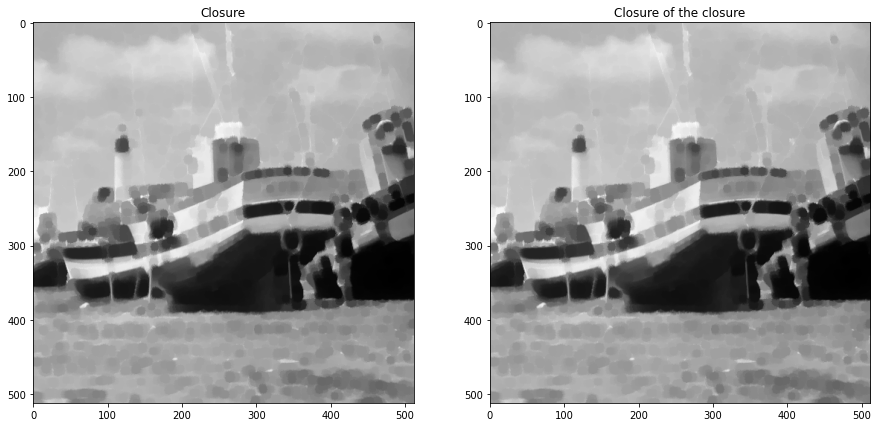

In [17]:
if student:
  
  strell = morpho.disk(5)

  fig,ax = plt.subplots(1,2, figsize=(15,8))
  ax = ax.reshape(-1)

  # closing operation
  imgB = morpho.closing(img, strell)

  # two successive closing operations
  imgBB = morpho.closing(imgB, strell)

  imgs = [imgB, imgBB] 

  names = ["Closure","Closure of the closure"]

  for i in range(2):
      ax[i].set_title(names[i])
      ax[i].imshow(imgs[i],cmap = "gray")
  plt.show()

In [18]:
print( "Different pixels between XB and XBB: ", np.sum( imgB != imgBB ) )

Different pixels between XB and XBB:  0


- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : The top-hat transformation allows the detection of objects that are smaller then the structuring element (in which the structuring element cannot be fit) and that are brigther then their surroundings. For example, when using a ball as the structuring element, small bright elements are detected no matter their orientation, however, when using vertical segments, we detect mainly bright horizontal artefacts and, when using horizontal segments, bright vertical structures are detected.

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : For the dual top-hat transformation, the same analysis made for the top-hat transformation applies, but for dark regions instead of bright ones.

In [19]:
def line_strell(l, w):
  if student:
    strell = np.ones((l,w))
  return(strell)

def top_hat(img, strell):
  th = img - morpho.opening(img, strell)
  dth = morpho.closing(img, strell) - img

  fig, ax = plt.subplots( 1, 3, figsize = (20,7))
  ax = ax.reshape(-1)

  imgs = [img, th, dth]
  names = ["Original image", "Top-hat", "Dual top-hat"]
  for i in range(3):
    ax[i].set_title(names[i])
    ax[i].imshow(imgs[i],cmap = "gray")
  plt.show()

Structuring element: disk of increasing size


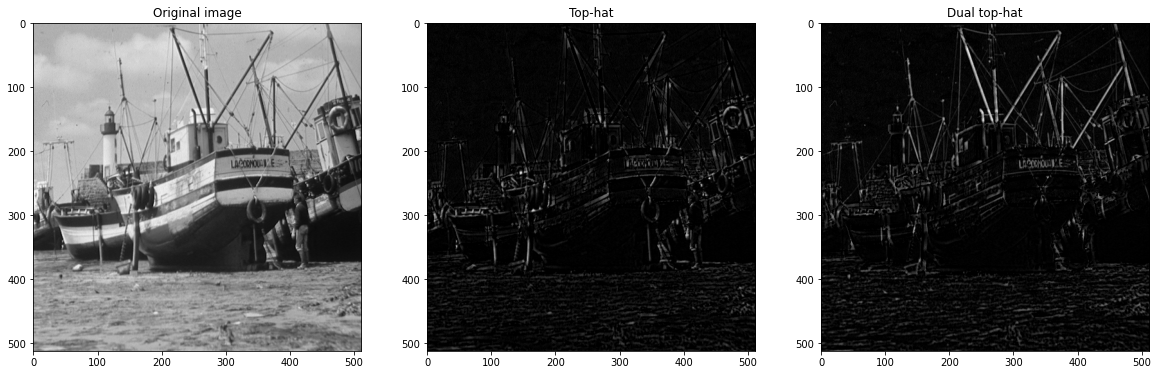

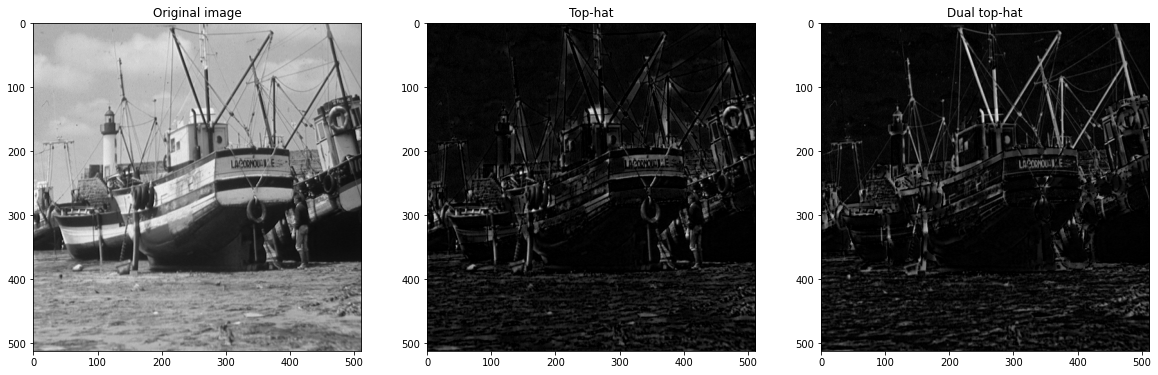

In [20]:
if student:
  print("Structuring element: disk of increasing size")
  # small disk
  strell = morpho.disk(3)
  top_hat(img, strell)

  # larger disk
  strell = morpho.disk(5)
  top_hat(img, strell)

Structuring element: vertical segment


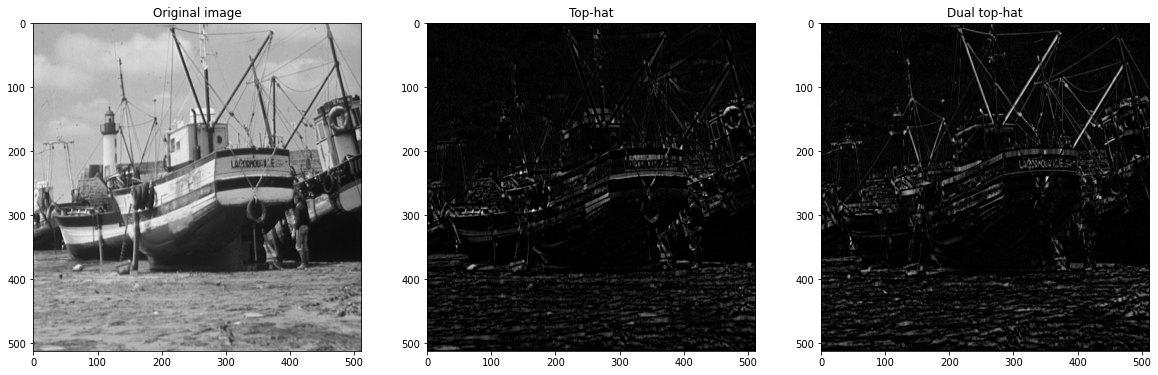

Structuring element: horizontal segment


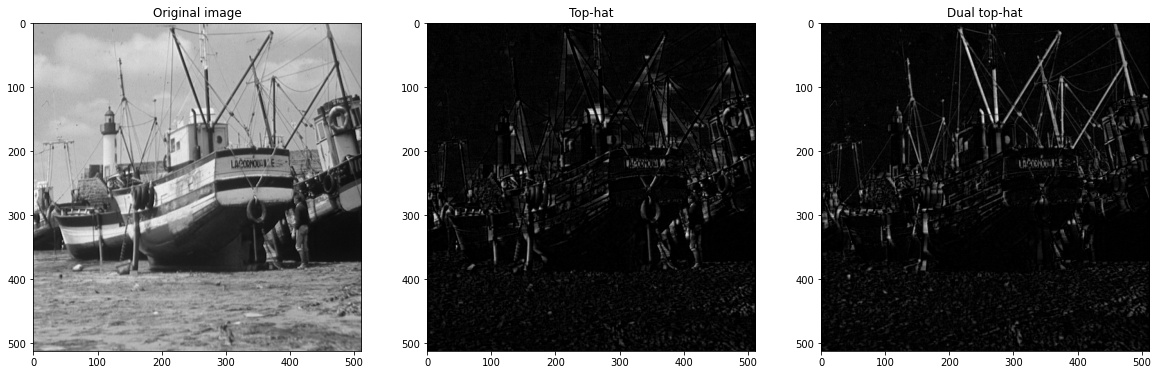

In [21]:
if student:
  print("Structuring element: vertical segment")
  strell = line_strell( 10, 2 )
  top_hat(img, strell)

  print("Structuring element: horizontal segment")
  strell = line_strell( 2, 10 )
  top_hat(img, strell)

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by using the following code and trying out your own combinations. What kind of filtering can be expected from such operations?
- **A**: The filtering operation that can be expected from alternate sequential filters is noise cancellation and smoothing, as can be observed in the cells bellow. The smallest variation that can be observed after successive opening and closing operations is of the sape and size of the structuring element.

In [25]:
def alternating_filters( img, strell_gen, size_list ):

    r = int( np.ceil( (len(size_list)+1)/3 ) )
    fig,ax = plt.subplots( r, 3, figsize = (20,r*6) )
    ax = ax.reshape(-1)

    imgf = img.copy()   
    for i in range( len(size_list) ):
        se = strell_gen( size_list[i] )
        imgf = morpho.closing( morpho.opening(imgf, se), se )
        ax[i].imshow (imgf, cmap = "gray" )

    ax[len(size_list)].imshow(img, cmap='gray')

    for a in ax:
        a.axis('off')

    plt.show()

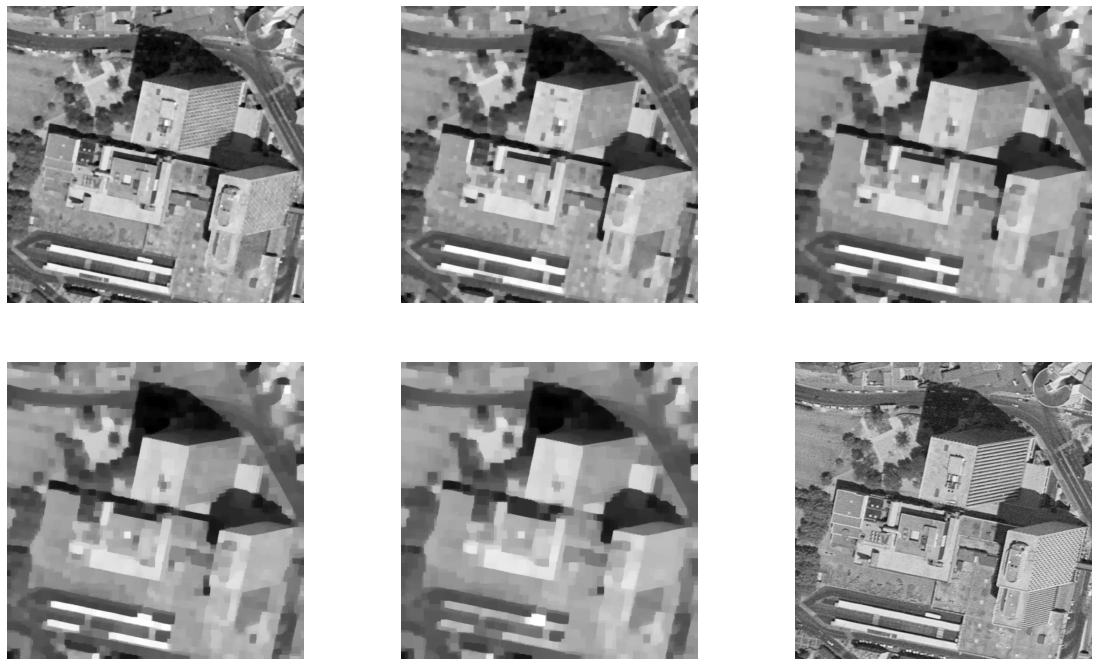

In [26]:
# squares of lateral size 3, 5, 7, 9, 11
img = skio.imread("images/montreuil.tif")
alternating_filters(img, morpho.square, [3,5,7,9,11])

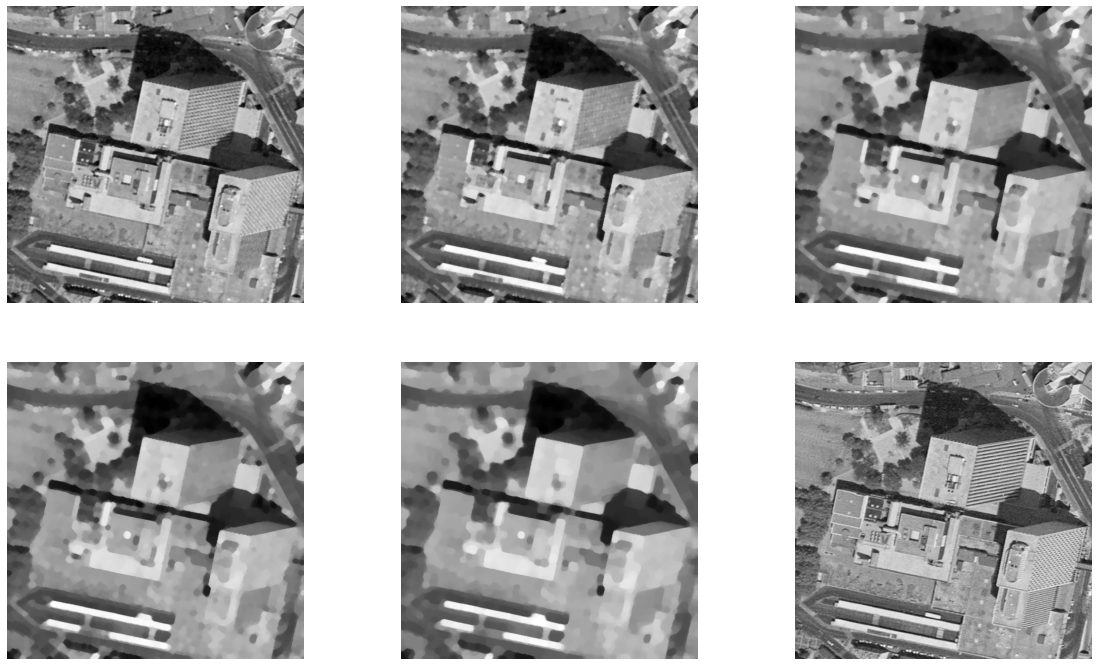

In [27]:
# disks of diameter size 3, 5, 7, 9, 11
img = skio.imread("images/montreuil.tif")
alternating_filters(img, morpho.disk, [1,2,3,4,5])

### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: Applying the morphological gradient to the image we obtain results that are similar to those we would get if we computed the gradient of the images. Dilation increases light regions and reduces dark ones, on the other hand, erosion increases dark regions and reduces light ones, therefore, when we compute the difference between the two operations, we get the contours of the objects. The thickness of the contours depend on the size of the structuring element: the larger the element, the thicker the contour. Also, increasing the structuring element size, we observe less noise and false contours.

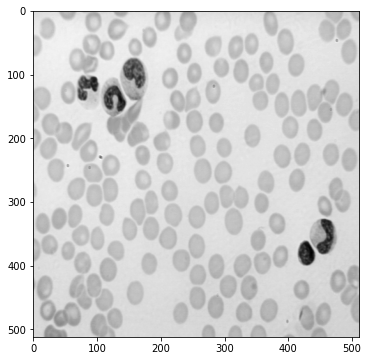

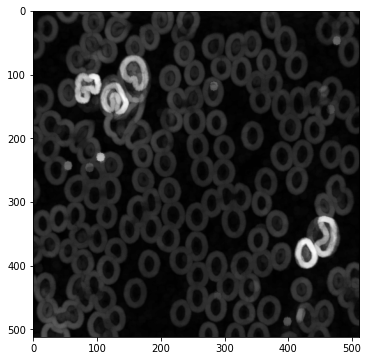

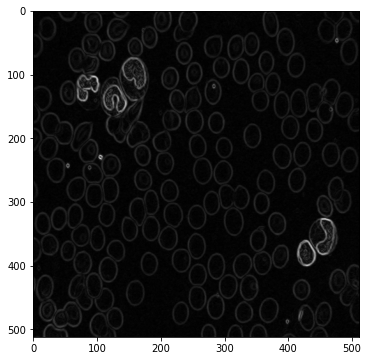

In [134]:
img = skio.imread("images/cell.tif")
plt.figure(figsize=(6,6))
plt.imshow(img,cmap = "gray")
plt.show()

# disk of radius 5
if student : 
  se = morpho.disk(5)
  morpho_grad = morpho.dilation(img, se) - morpho.erosion(img, se)
  
plt.figure(figsize=(6,6))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()

# disk of radius 1
if student : 
  se = morpho.disk(1)
  morpho_grad = morpho.dilation(img, se) - morpho.erosion(img, se)

plt.figure(figsize=(6,6))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()

- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is is difficult to find an appropriate threshold value ?
- **A** : It is difficult to find the appropriate threshold value because as we increase it, parisite structures are supressed, but true contours between zones whose grey levels are close also disapear, therefore those two aspects have to be balanced.

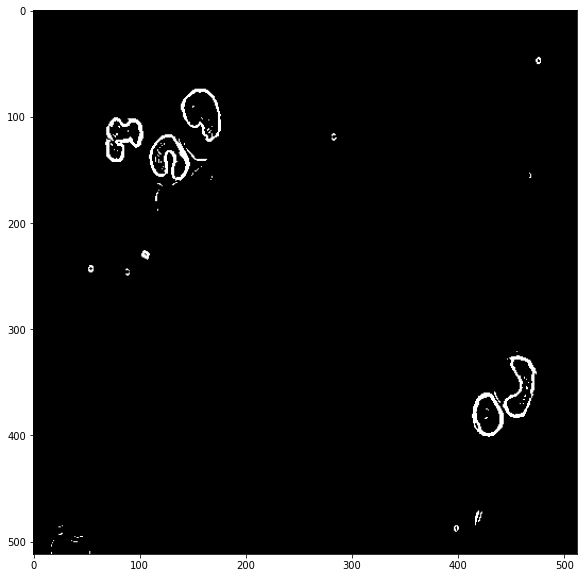

In [135]:
if student :
  thresh_grad = ( morpho_grad > 25 )
plt.figure(figsize=(10,10))
plt.imshow(thresh_grad,cmap  ="gray")
plt.show()

- **Q** Apply the watershed algorithm to the gradient image using morpho.watershed(morpho_grad,k) ;
What do you observe? 
- **A**: In the following cell, the segmented regions were superimposed over the gradient image. We see that the watershed algorithm succesfully segments some cells, however, others are merged into a single region.

- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A**: The parameter k determines the number of different regions that are detected.

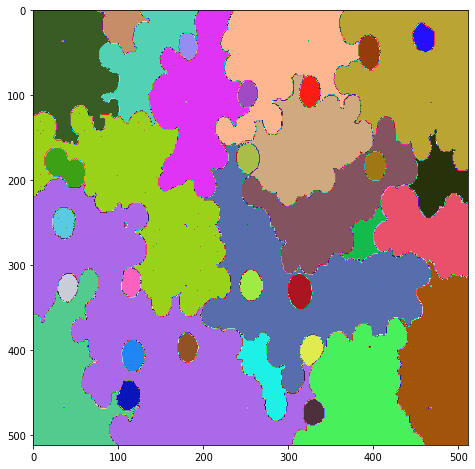

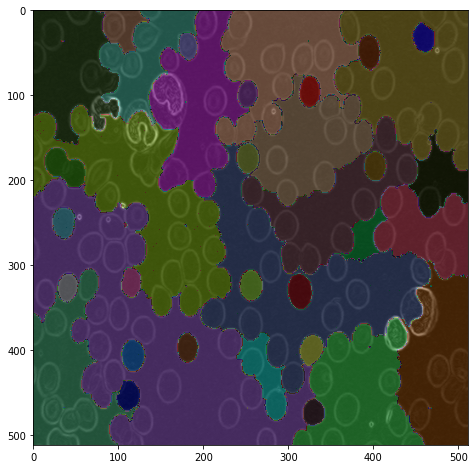

In [136]:
from skimage.segmentation import watershed

cmaprand = matplotlib.colors.ListedColormap ( np.random.rand (256,3) )

if student :
  k = 50
  wat = watershed(morpho_grad, k)

plt.figure( figsize=(8,8) )
plt.imshow(wat, cmap = cmaprand)
plt.show()

plt.figure( figsize=(8,8) )
plt.imshow(morpho_grad, cmap  ="gray")
plt.imshow(wat, cmap = cmaprand, alpha=0.4)
plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better? In which sense and why?
- **A** : When applying a closing on the gradient image, small dark regions are supressed, as such the contours became more continuous and some microstructures and noise were smoothed out. However the result of the watershed algorithm wasn't improved, this might be explained by observing that due to the smoothing out of internal structures the interior of the cells became lighter, so their contours aren't as marked.

- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous?
- **A** : When applying an opening, we have the supression of small light regions, as such the contours of the cells were degraded and the result of the watershed algorithm was worse.

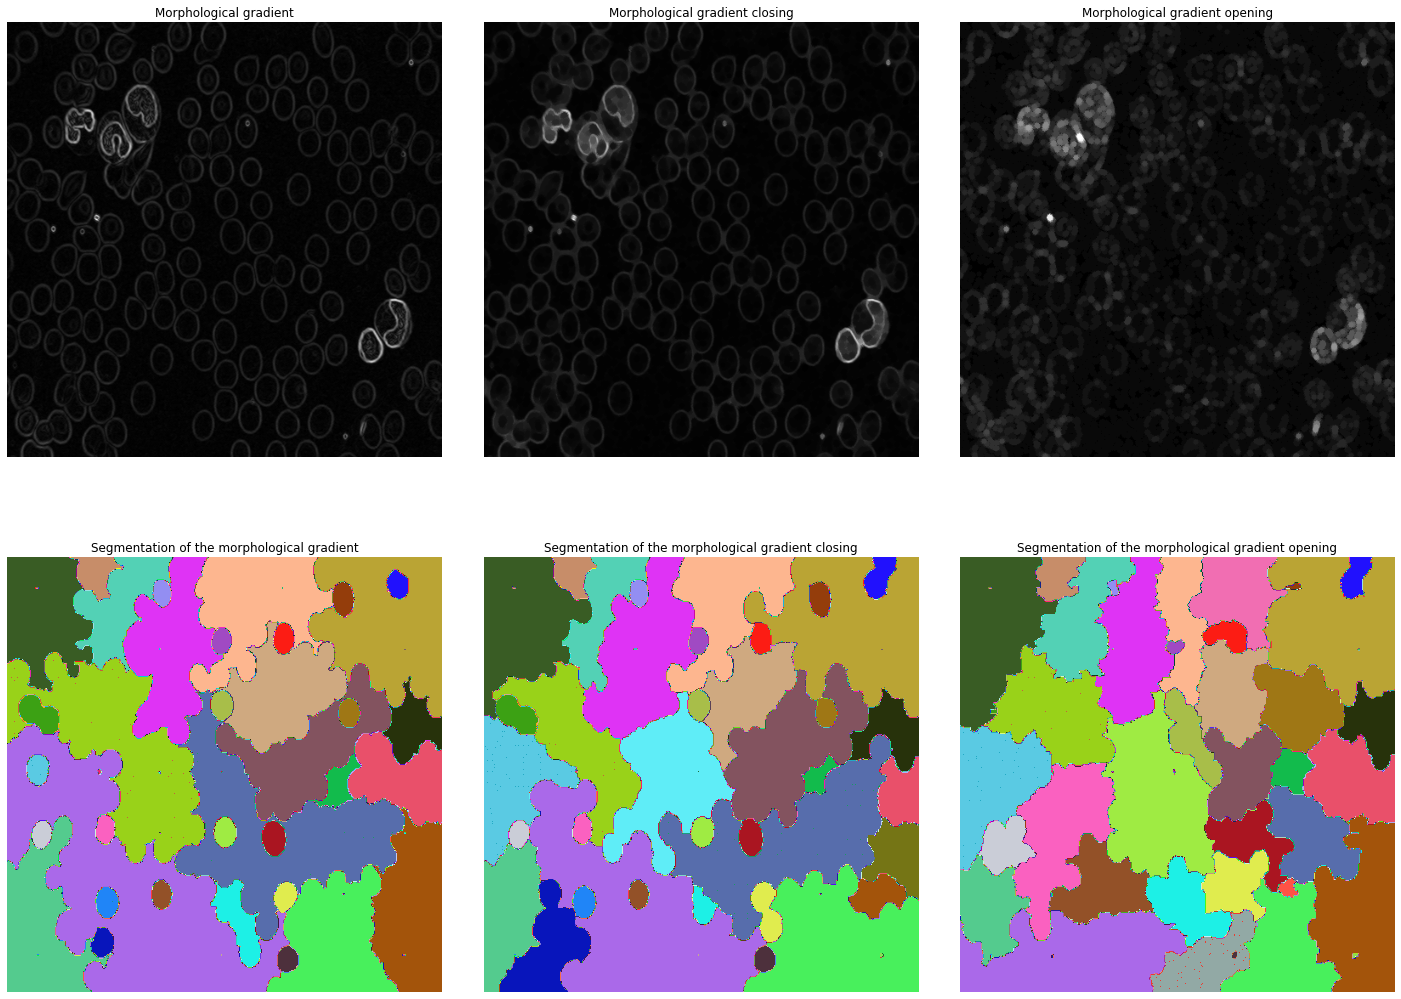

In [161]:
se = morpho.disk(3)
morpho_grad_closing = morpho.closing(morpho_grad, se)
morpho_grad_opening = morpho.opening(morpho_grad, se)

k = 50
wat_closing = watershed(morpho_grad_closing, k)
wat_opening = watershed(morpho_grad_opening, k)

fig, ax = plt.subplots( 2,3, figsize=(20,15) )
fig.tight_layout()
ax = ax.reshape(-1)

ax[0].set_title("Morphological gradient")
ax[0].imshow(morpho_grad, cmap ='gray')

ax[1].set_title("Morphological gradient closing")
ax[1].imshow(morpho_grad_closing, cmap ='gray')

ax[2].set_title("Morphological gradient opening")
ax[2].imshow(morpho_grad_opening, cmap ='gray')

ax[3].set_title("Segmentation of the morphological gradient")
ax[3].imshow(wat, cmap =cmaprand)

ax[4].set_title("Segmentation of the morphological gradient closing")
ax[4].imshow(wat_closing, cmap =cmaprand)

ax[5].set_title("Segmentation of the morphological gradient opening")
ax[5].imshow(wat_opening, cmap =cmaprand)

for a in ax:
    a.axis('off')

plt.show()

We now propose to try to do better than what you did with the closure and opening by using specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. What do you observe? Could it help you to efficiently segment the cells?

**A** : When computing the reconstruction from the opening of the gradient, we observe as a result an image which has more information, details and noise than the original morphological gradient image. Therefore it it wouldn't improve the segmentation of the cells.

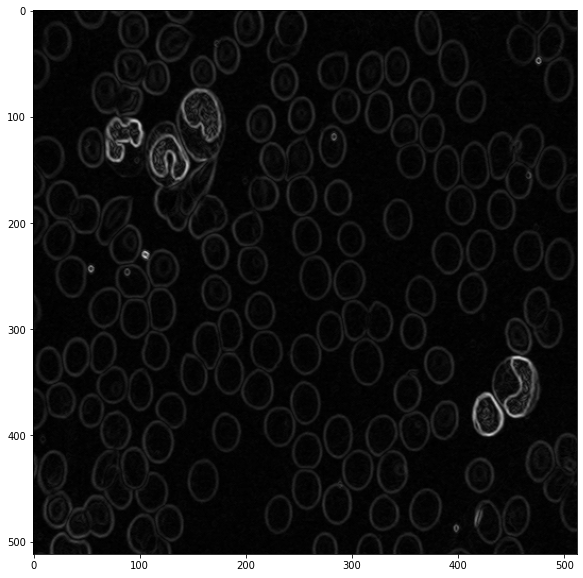

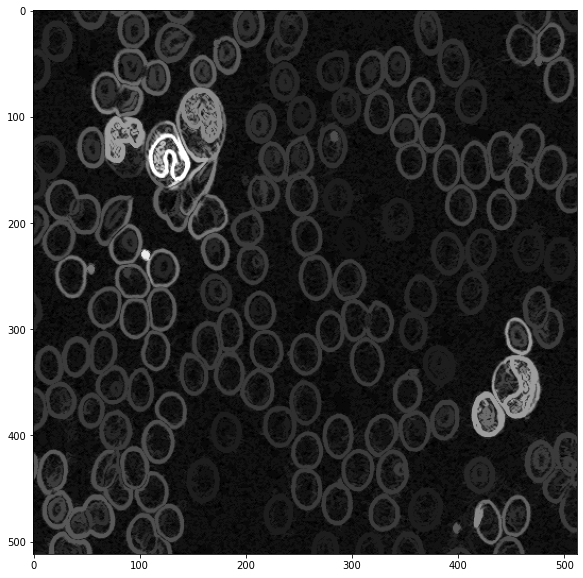

In [141]:
se_rec = morpho.disk(3)
imOpen = morpho.opening( morpho_grad, se_rec )
recoOpen = morpho.reconstruction( imOpen, morpho_grad )

plt.figure(figsize =(10,10))
plt.imshow(morpho_grad,cmap = "gray")
plt.show()

plt.figure(figsize =(10,10))
plt.imshow(recoOpen,cmap = "gray")
plt.show()


**Q** : In the next cell, compute the reconstruction from an closing of the gradient. What do you observe? Could it help you to efficiently segment the cells?

**A** : When computing the reconstruction from the closing of the gradient, the result is an image that preserved almost only the contours, therefore it's expected that it would help to efficiently segment the cells.

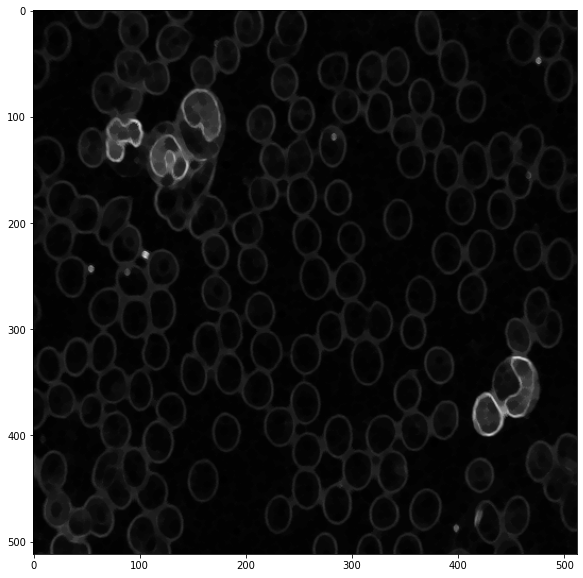

In [142]:
se_rec = morpho.disk(3)
imClos = morpho.closing( morpho_grad, se_rec )
recoClos = morpho.reconstruction( morpho_grad, imClos )

plt.figure(figsize =(10,10))
plt.imshow(recoClos,cmap = "gray")
plt.show()

**Q** : Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

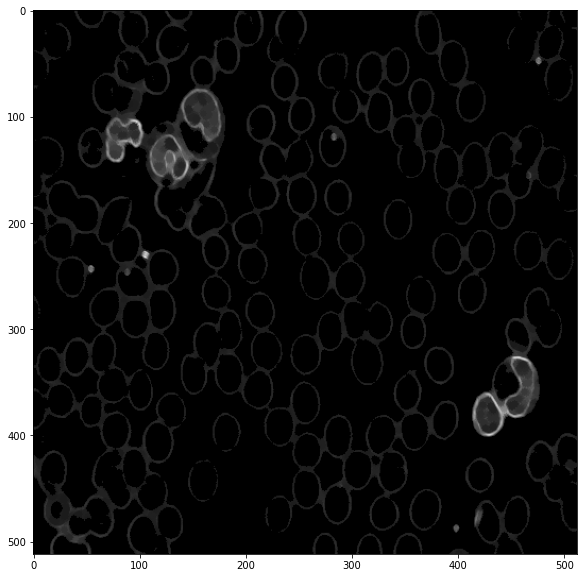

In [154]:
recoClosClean = recoClos*(recoClos>10)

plt.figure(figsize =(10,10))
plt.imshow(recoClosClean,cmap = "gray")
plt.show()

/tmp/ipykernel_201969/875671028.py:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_minimum = skimage.feature.peak_local_max( 255-recoClosClean, indices=False )


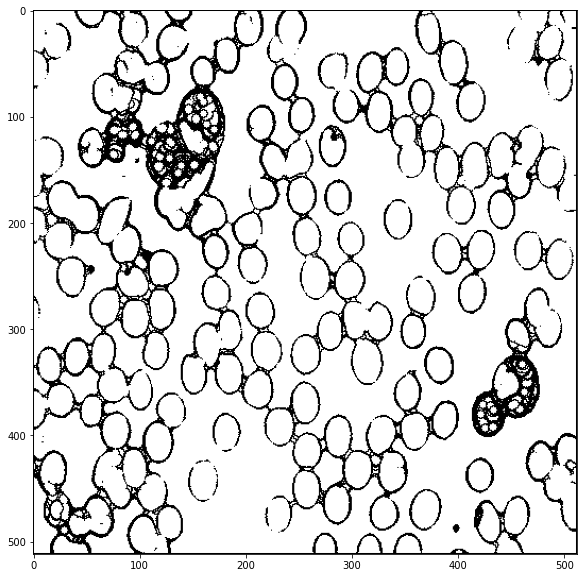

In [156]:
local_minimum = skimage.feature.peak_local_max( 255-recoClosClean, indices=False )

plt.figure( figsize=(10,10) )
plt.imshow(local_minimum, cmap='gray')
plt.show()

In [157]:
from scipy import ndimage as ndi
markers = ndi.label( local_minimum )[0]

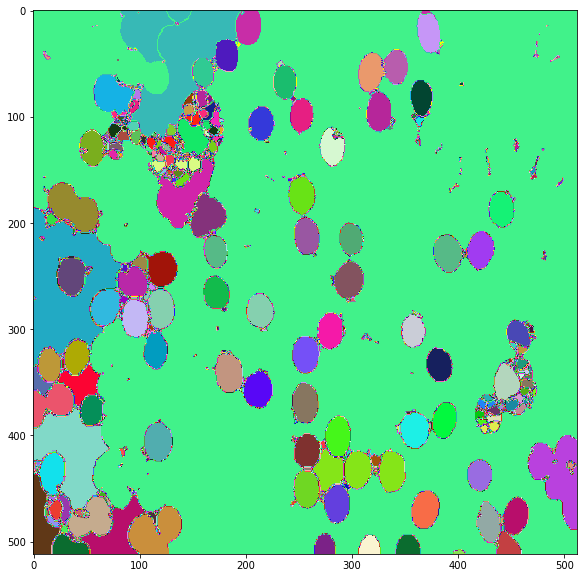

In [159]:
wat_markers = watershed( recoClosClean, markers=markers, watershed_line=True )

plt.figure( figsize=(10,10) )
plt.imshow( wat_markers, cmap=cmaprand )
plt.show()